<a href="https://colab.research.google.com/github/kalpg69/nifty50LSTM/blob/master/nifty50_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, LSTM, Dropout
import pandas as pd
import pandas_datareader.data as web
import datetime
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
train_data_start = datetime.datetime(2010, 1, 1)
train_data_end = datetime.datetime(2021, 5, 30)
train_data_df = web.DataReader("^NSEI", 'yahoo', train_data_start, train_data_end)

In [3]:
train_data_df = train_data_df.sort_values('Date')
train_data_df.reset_index(inplace=True)
train_data_df.set_index('Date', inplace=True)

In [4]:
train_data = train_data_df.loc[:, 'Adj Close'].values
scaler = MinMaxScaler()
train_data = train_data.reshape(-1, 1)
scaler.fit(train_data)
train_data = scaler.transform(train_data)

In [5]:
def create_dataset(dataset, look_back):
  X_data, y_data = [], []
  for i in range(len(dataset) - look_back):
    X_data.append(dataset[i:(i + look_back), 0])
    y_data.append(dataset[i + look_back, 0])
  return np.array(X_data), np.array(y_data)

In [6]:
time_steps = 30
X_train, y_train = create_dataset(train_data, time_steps)
X_train = np.reshape(X_train, (X_train.shape[0], time_steps, 1))

In [7]:
model = keras.Sequential()
model.add(LSTM(units = 128, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
#model.add(LSTM(units=100, return_sequences=True))
#model.add(Dropout(0.2))
#model.add(LSTM(units=100, return_sequences=True))
#model.add(Dropout(0.2))
model.add(LSTM(units = 128))
model.add(Dropout(0.2))
model.add(Dense(units = 1))
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), loss = 'mean_squared_error')
history = model.fit(X_train, y_train, epochs = 20, batch_size = 10, validation_split=.30)

Epoch 1/20
194/194 [==============================] - 16s 64ms/step - loss: 0.0012 - val_loss: 8.0662e-04
Epoch 2/20
194/194 [==============================] - 12s 60ms/step - loss: 5.3464e-04 - val_loss: 0.0013
Epoch 3/20
194/194 [==============================] - 12s 60ms/step - loss: 4.7014e-04 - val_loss: 6.8846e-04
Epoch 4/20
194/194 [==============================] - 12s 61ms/step - loss: 4.0722e-04 - val_loss: 0.0012
Epoch 5/20
194/194 [==============================] - 12s 61ms/step - loss: 4.0046e-04 - val_loss: 0.0045
Epoch 6/20
194/194 [==============================] - 12s 60ms/step - loss: 3.6083e-04 - val_loss: 6.3960e-04
Epoch 7/20
194/194 [==============================] - 12s 60ms/step - loss: 3.0794e-04 - val_loss: 7.8679e-04
Epoch 8/20
194/194 [==============================] - 12s 60ms/step - loss: 2.8302e-04 - val_loss: 5.1403e-04
Epoch 9/20
194/194 [==============================] - 12s 60ms/step - loss: 2.6819e-04 - val_loss: 5.2609e-04
Epoch 10/20
194/194 [=====

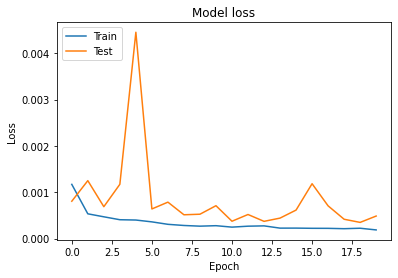

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()